# **Data Structures for Coding Interviews**
---

## **Computer science in plain English**
To really understand how data structures work, we're going to derive each of them from scratch. Starting with bits.

Don't worry—we'll skip the convoluted academic jargon and proofs.

We'll cover:

* Random Access Memory
* Binary Numbers
* Fixed-Width Integers
* Arrays
* Strings
* Pointers
* Dynamic Arrays
* Linked Lists
* Hash Tables

## **Random Access Memory (RAM)**
When a computer is running code, it needs to keep track of variables (numbers, strings, arrays, etc.).

Variables are stored in random access memory (RAM). We sometimes call RAM "working memory" or just "memory."

> RAM is not where mp3s and apps get stored. In addition to "memory," your computer has storage (sometimes called "persistent storage" or "disk"). While memory is where we keep the variables our functions allocate as they crunch data for us, storage is where we keep files like mp3s, videos, Word documents, and even executable programs or apps.

> Memory (or RAM) is faster but has less space, while storage (or "disk") is slower but has more space. A modern laptop might have ~500GB of storage but only ~16GB of RAM.

Think of RAM like a really tall bookcase with a lot of shelves. Like, billions of shelves.

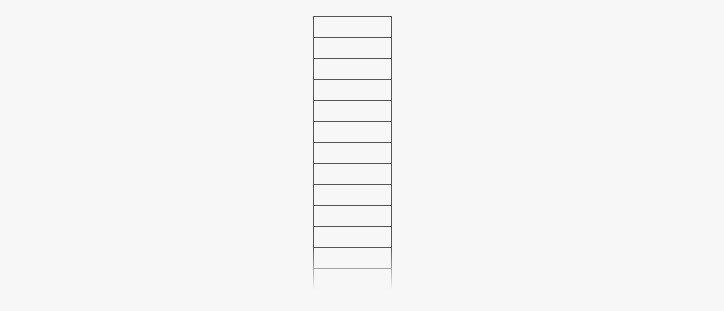
> It just keeps going down. Again, picture billions of these shelves.


The shelves are numbered.

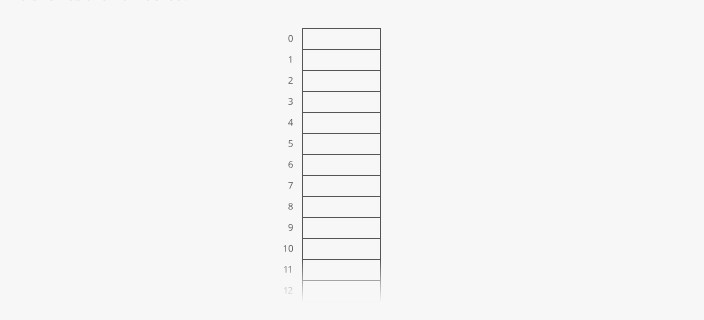

We call a shelf's number its *address*.
Each shelf holds 8 **bits**. A bit is a tiny electrical switch that can be turned "on" or "off." But instead of calling it "on" or "off" we call it 1 or 0.


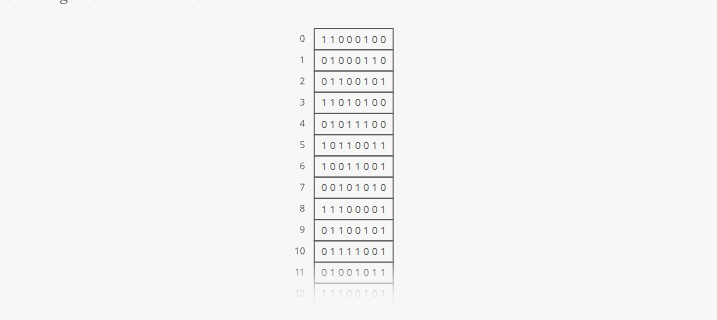

8 bits is called a **byte**. So each shelf has one byte (8 bits) of storage.

Of course, we also have a processor that does all the real work inside our computer:

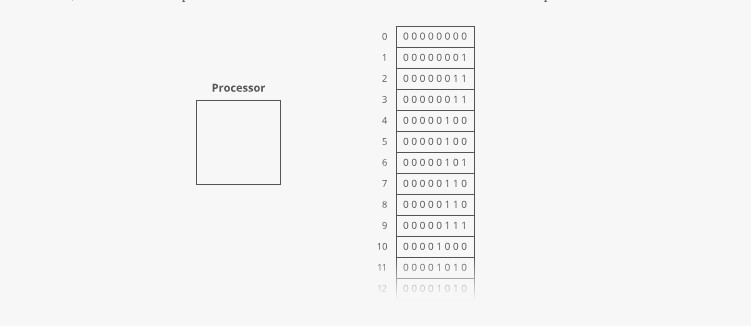

It's connected to a **memory controller**. The memory controller does the actual reading and writing to and from RAM. It has a direct connection to each shelf of RAM.

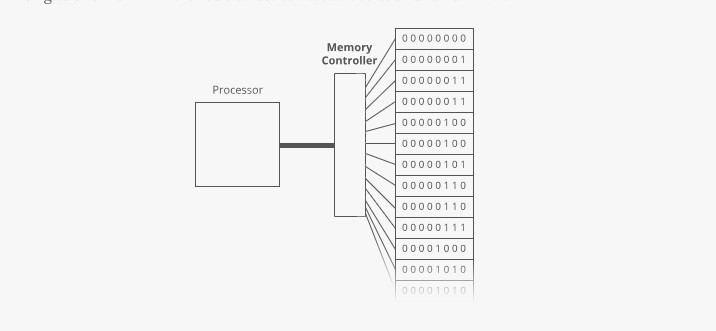


That direct connection is important. It means we can access address 0 and then immediately access address 918,873 without having to "climb down" our massive bookshelf of RAM.

That's why we call it Random Access Memory (RAM)—we can Access the bits at any Random address in Memory right away.

> Spinning hard drives don't have this "random access" superpower, because there's no direct connection to each byte on the disk. Instead, there's a reader—called a head—that moves along the surface of a spinning storage disk (like the needle on a record player). Reading bytes that are far apart takes longer because you have to wait for the head to physically move along the disk.

Even though the memory controller can jump between far-apart memory addresses quickly, programs tend to access memory that's nearby. **So computers are tuned to get an extra speed boost when reading memory addresses that're close to each other**. Here's how it works:

The processor has a **cache** where it stores a copy of stuff it's recently read from RAM.

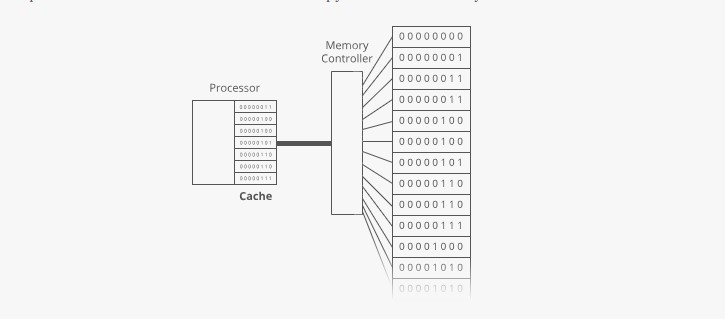

> Actually, it has a series of caches. But we can picture them all lumped together as one cache like this.

This cache is much faster to read from than RAM, so the processor saves time whenever it can read something from cache instead of going out to RAM.

**When the processor asks for the contents of a given memory address, the memory controller also sends the contents of a handful of nearby memory addresses**. And the processor puts all of it in the cache.

So if the processor asks for the contents of address 951, then 952, then 953, then 954...it'll go out to RAM once for that first read, and the subsequent reads will come straight from the super-fast cache.

But if the processor asks to read address 951, then address 362, then address 419...then the cache won't help, and it'll have to go all the way out to RAM for each read.

So reading from sequential memory addresses is faster than jumping around.

## **Binary numbers**

Let's put those bits to use. Let's store some stuff. Starting with numbers.

The number system we usually use (the one you probably learned in elementary school) is called **base 10**, because each digit has ten possible values (1, 2, 3, 4, 5, 6, 7, 8, 9, and 0).

But computers don't have digits with ten possible values. They have bits with two possible values. So they use **base 2** numbers.

Base 10 is also called **decimal**. Base 2 is also called **binary**.

To understand binary, let's take a closer look at how decimal numbers work. Take the number "101" in decimal:
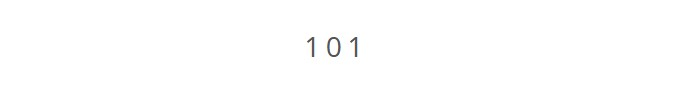
Notice we have two "1"s here, but they don't mean the same thing. The leftmost "1" means 100, and the rightmost "1" means 1. That's because the leftmost "1" is in the hundreds place, while the rightmost "1" is in the ones place. And the "0" between them is in the tens place.

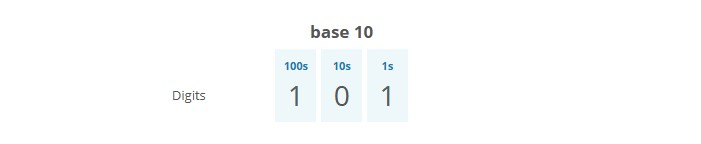

**So this "101" in base 10 is telling us we have "1 hundred, 0 tens, and 1 one."**


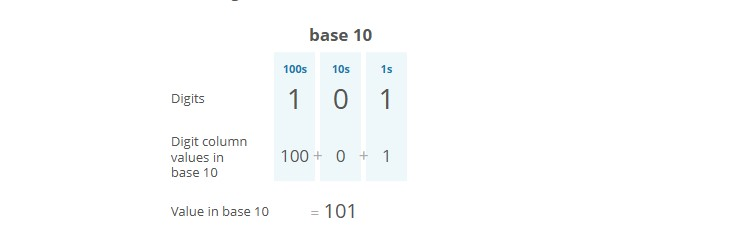

Notice how the places in base 10 (ones place, tens place, hundreds place, etc.) are sequential powers of 10:

* $10^0 = 1$
* $10^1 = 10$
* $10^2 = 100$
* $10^3 = 1000$
* etc.

**The places in *binary* (base 2) are sequential powers of 2:**

* $2^0 = 1$
* $2^1 = 2$
* $2^2 = 4$
* $2^3 = 8$
* etc.

So let's take that same "101" but this time let's read it as a *binary* number:

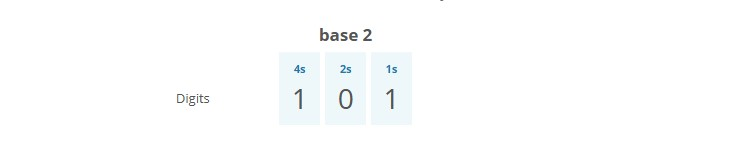

Reading this from right to left: we have a 1 in the ones place, a 0 in the twos place, and a 1 in the fours place. So our total is 4 + 0 + 1 which is 5.

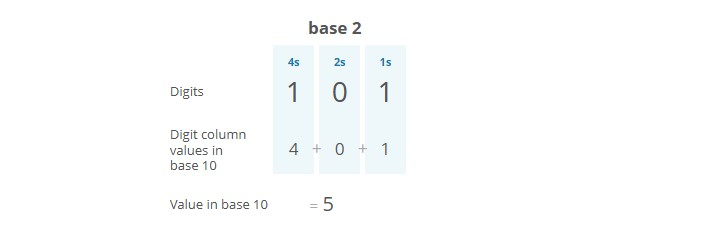

Here's how we'd count up to 12 in binary:

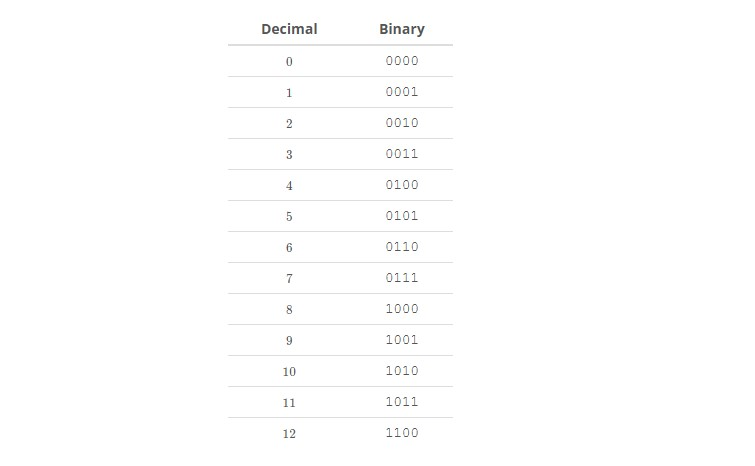

So far we've been talking about **unsigned** integers ("unsigned" means non-negative, and "integer" means a whole number, not a fraction or decimal). Storing other numbers isn't hard though. Here's how some other numbers could be stored:

**Fractions:** Store two numbers: the numerator and the denominator.

**Decimals:** Also two numbers: 1) the number with the decimal point taken out, and 2) the position where the decimal point goes (how many digits over from the leftmost digit).

**Negative Numbers**: Reserve the leftmost bit for expressing the sign of the number. 0 for positive and 1 for negative.

In reality we usually do something slightly fancier for each of these. But these approaches work, and they show how we can express some complex stuff with just 1s and 0s.

> We've talked about base 10 and base 2...you may have also seen base 16, also called hexadecimal or hex. In hex, our possible values for each digit are 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, a, b, c, d, e, and f. Hex numbers are often prefixed with "0x" or "#". In CSS, colors are sometimes expressed in hex. Youtube's signature red color is "#FE0032".

## **Fixed-width integers**
How many different numbers can we express with 1 byte (8 bits)?

$2^8 = 256$ different numbers. How did we know to take $2^8$?

<details id=0 open>
<summary>click</summary>
Let's start simpler: how many integers can we express with 1 bit? Just 2:

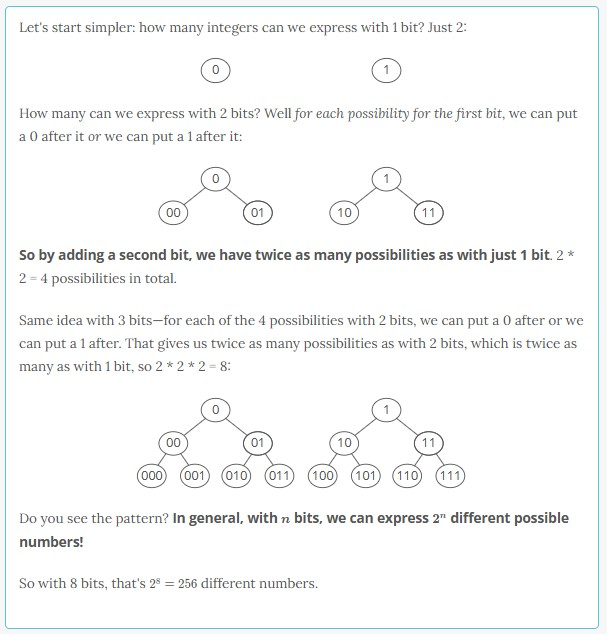

> What happens if we have the number 255 in an 8-bit unsigned integer (1111 1111 in binary) and we add 1? The answer (256) needs a 9th bit (1 0000 0000). But we only have 8 bits!

>This is called an **integer overflow**. At best, we might just get an error. At worst, our computer might compute the correct answer but then just throw out the 9th bit, giving us zero (0000 0000) instead of 256 (1 0000 0000)! (Python actually notices that the result won't fit and automatically allocates more bits to store the larger number.)

The 256 possibilities we get with 1 byte are pretty limiting. So **we usually use 4 or 8 bytes (32 or 64 bits) for storing integers**.
* 32-bit integers have $ 2^{32} $ possible values—more than 4 billion
* 64-bit integers have $2^{64}$ possible values—more than 10 billion billion

> "How come I've never had to think about how many bits my integers are?" Maybe you have but just didn't know it.

> Have you ever noticed how in some languages (like Java and C) sometimes numbers are Integers and sometimes they're Longs? The difference is the number of bits (in Java, Integers are 32 bits and Longs are 64).

> Ever created a table in SQL? When you specify that a column will hold integers, you have to specify how many bytes: 1 byte (tinyint), 2 bytes (smallint), 4 bytes (int), or 8 bytes (bigint).

> When is 32 bits not enough? When you're counting views on a viral video. YouTube famously ran into trouble when the Gangnam Style video hit over $2^{31}$ views, [forcing them to upgrade their view counts from 32-bit to 64-bit signed integers.](http://arstechnica.com/business/2014/12/gangnam-style-overflows-int_max-forces-youtube-to-go-64-bit/)

Most integers are **fixed-width** or **fixed-length**, which means the number of bits they take up doesn't change.

It's usually safe to assume an integer is fixed-width unless you're told otherwise. Variable-size numbers exist, but they're only used in special cases.

If we have a 64-bit fixed-length integer, it doesn't matter if that integer is 0 or 193,457—it still takes up the same amount of space in RAM: 64 bits.

> **Are you familiar with big O notation?** It's a tool we use for talking about how much time an algorithm takes to run or how much space a data structure takes up in RAM. It's pretty simple:

> $O(1)$ or **constant** means the time or space stays about the same even as the dataset gets bigger and bigger.

> $O(n)$ or linear means the time or space grows proportionally as the dataset grows.
So $O(1)$ space is much smaller than $O(n)$ space. And $O(1)$ time is much faster than $O(n)$ time.

> That's all you need for this piece. But if you're curious, you can read [whole big O explainer here](https://colab.research.google.com/drive/1eujSiyRba_xz7NQGHjCG6XwhaXs4zNFc?usp=sharing).

In big O notation, we say **fixed-width integers** take up *constant space* or $O(1)$ space.

And because they have a constant number of bits, **most simple operations** on **fixed-width integers** (addition, subtraction, multiplication, division) take **constant time** ($O(1)$ time).

So fixed-width integers are very space efficient and time efficient.

But that efficiency comes at a cost—*their values are limited*. Specifically, they're limited to $2^n$ possibilities, where $n$ is the number of bits.

So there's a tradeoff. As we'll see, that's a trend in data structures—to get a nice property, we'll often have to lose something.

## **Arrays**

Ok, so we know how to store individual numbers. Let's talk about storing several numbers.

That's right, things are starting to heat up.

Suppose we wanted to keep a count of how many bottles of kombucha we drink every day.

Let's store each day's kombucha count in an 8-bit, fixed-width, unsigned integer. That should be plenty—we're not likely to get through more than $256 (2^8)$ bottles in a *single day*, right?

And let's store the kombucha counts right next to each other in RAM, starting at memory address 0:

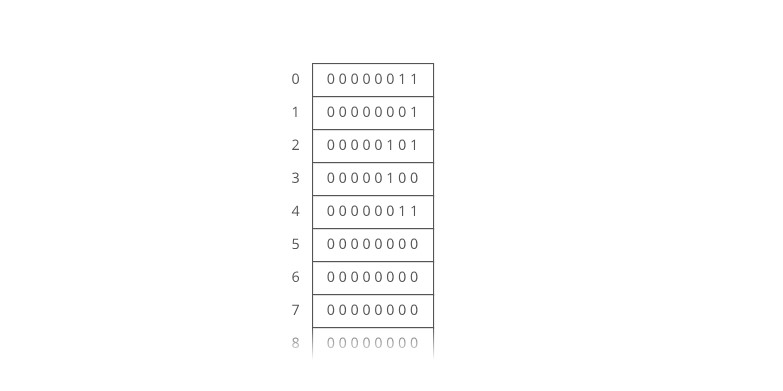

Bam. That's an **array**. RAM is basically an array already.

Just like with RAM, the elements of an array are numbered. We call that number the **index** of the array element (plural: indices). In this example, each array element's index is the same as its address in RAM.

But that's not usually true. Suppose another program like Spotify had already stored some information at memory address 2:

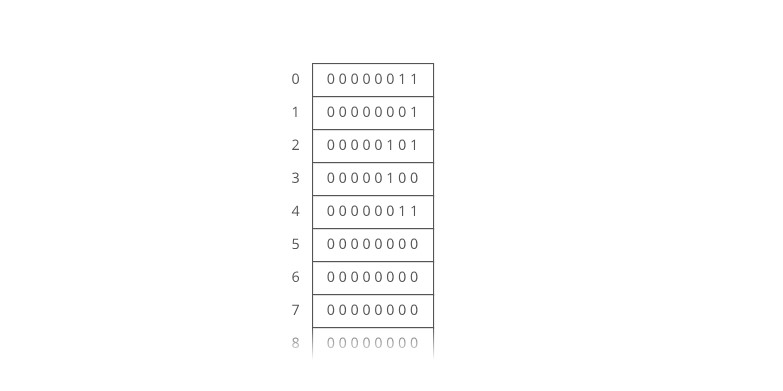

We'd have to start our array below it, for example at memory address 3. So index 0 in our array would be at memory address 3, and index 1 would be at memory address 4, etc.:

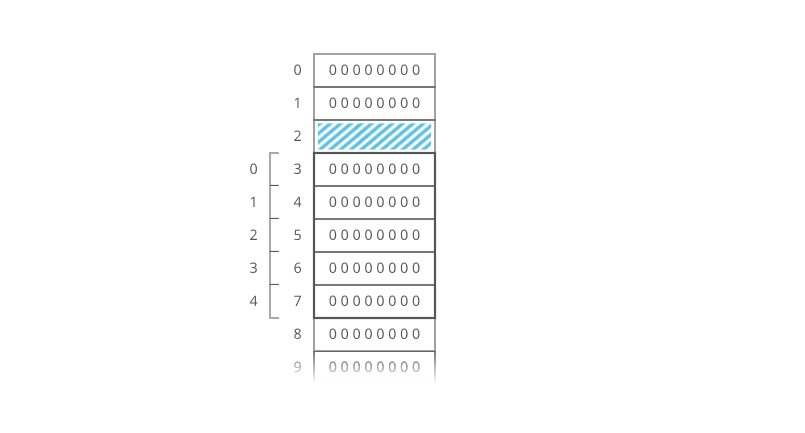

Suppose we wanted to get the kombucha count at index 4 in our array. How do we figure out what *address in memory to go to*? Simple math:

Take the array's starting address (3), add the index we're looking for (4), and that's the address of the item we're looking for. $3 + 4 = 7$. In general, for getting the $n$th item in our array:

$$ \text{address of } n\text{th item in array} = $$
$$ \text{address of array start} + n $$

This works out nicely because the size of the addressed memory slots and the size of each kombucha count are both 1 byte. So a slot in our array corresponds to a slot in RAM.

But that's not always the case. In fact, it's *usually not the case*. We usually use 64-bit integers.

So how do we build an array of 64-bit (8 byte) integers on top of our 8-bit (1 byte) memory slots?

We simply give each array index 8 address slots instead of 1:

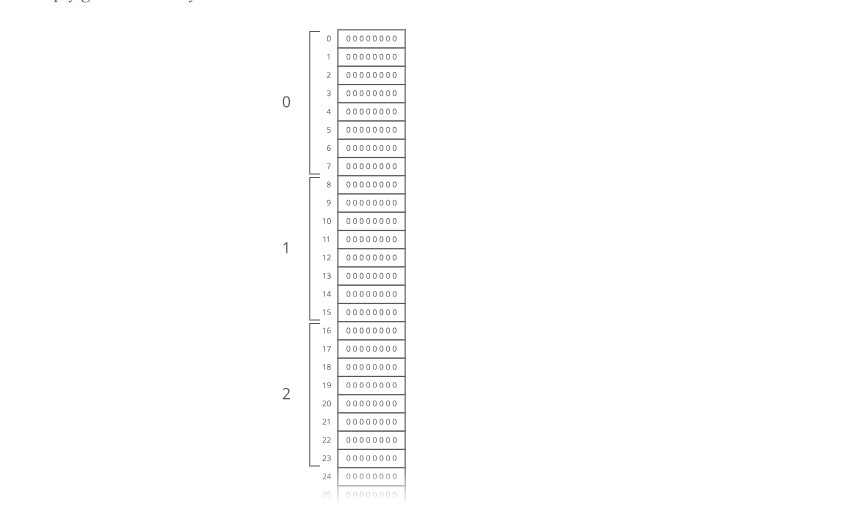

So we can still use simple math to grab the start of the *nth* item in our array—just gotta throw in some multiplication:

$$ \text{address of nth item in array} =$$

$$ \text{address of array start + (n * size of each item in bytes)}$$

Don't worry—adding this multiplication doesn't really slow us down. Remember: addition, subtraction, multiplication, and division of fixed-width integers takes $O(1)$ time. So all the math we're using here to get the address of the *nth* item in the array takes $O(1)$ time.

And remember how we said the memory controller has a *direct connection* to each slot in RAM? That means we can read the stuff at any given memory address in $O(1)$ time.

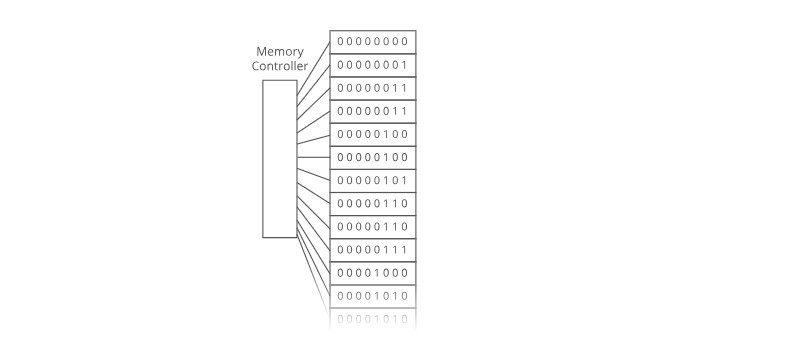

**Together, this means looking up the contents of a given array index is $O(1)$ time**. This fast lookup capability is the most important property of arrays.

But the formula we used to get the address of the $n$th item in our array only works if:

1.  **Each item in the array is the same size** (takes up the same number of bytes).
2.  **The array is uninterrupted (contiguous) in memory.** There can't be any gaps in the array...like to "skip over" a memory slot Spotify was already using.

These things make our formula for finding the $n$th item work because they make our array **predictable**. We can predict exactly where in memory the $n$th element of our array will be.

But they also constrain what kinds of things we can put in an array. Every item has to be the same size. And if our array is going to store a lot of stuff, we'll need a bunch of uninterrupted free space in RAM. Which gets hard when most of our RAM is already occupied by other programs (like Spotify).

That's the tradeoff. Arrays have fast lookups ($O(1)$ time), but each item in the array needs to be the same size, and you need a big block of uninterrupted free memory to store the array.

## **Strings**
Okay, let's store some words.

A series of *characters* (letters, punctuation, etc.) is called a **string**.

We already know one way to store a series of things—arrays. But how can an array store *characters* instead of numbers?

Easy. Let's define a mapping between numbers and characters. Let's say "A" is 1 (or `0000 0001` in binary), "B" is 2 (or `0000 0010` in binary), etc. Bam. Now we have characters.

This mapping of numbers to characters is called a **character encoding**. One common character encoding is "ASCII". Here's how the alphabet is encoded in ASCII:

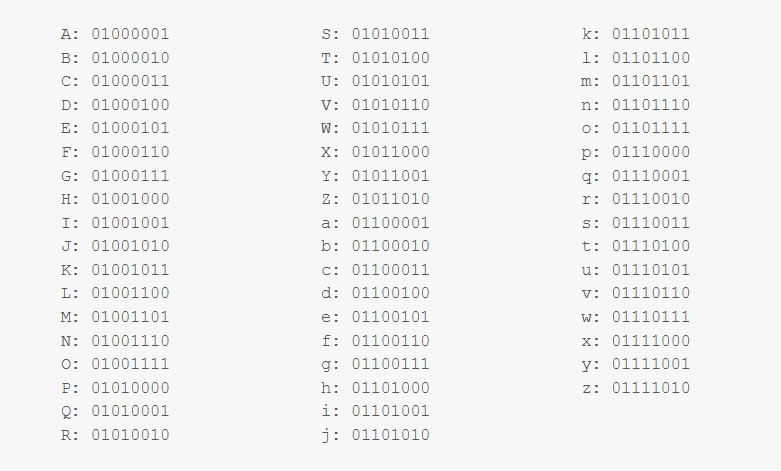

You get the idea. So since we can express characters as 8-bit integers, we can express strings as arrays of 8-bit ~numbers~ characters.

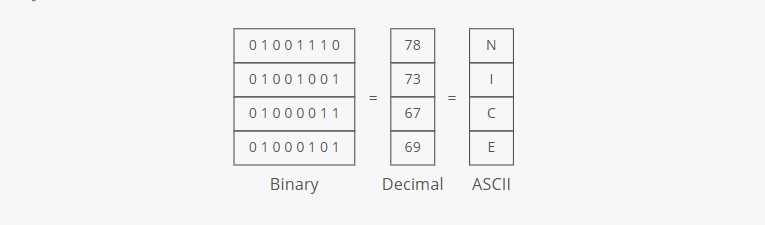



## **Pointers**

Remember how we said every item in an array had to be the same size? Let's dig into that a little more.

Suppose we wanted to store a bunch of ideas for baby names. Because we've got some really cute ones.

Each name is a string. Which is really an array. And now we want to store those arrays in an array. Whoa.

Now, what if our baby names have different lengths? That'd violate our rule that all the items in an array need to be the same size!

We could put our baby names in arbitrarily large arrays (say, 13 characters each), and just use a special character to mark the end of the string within each array...
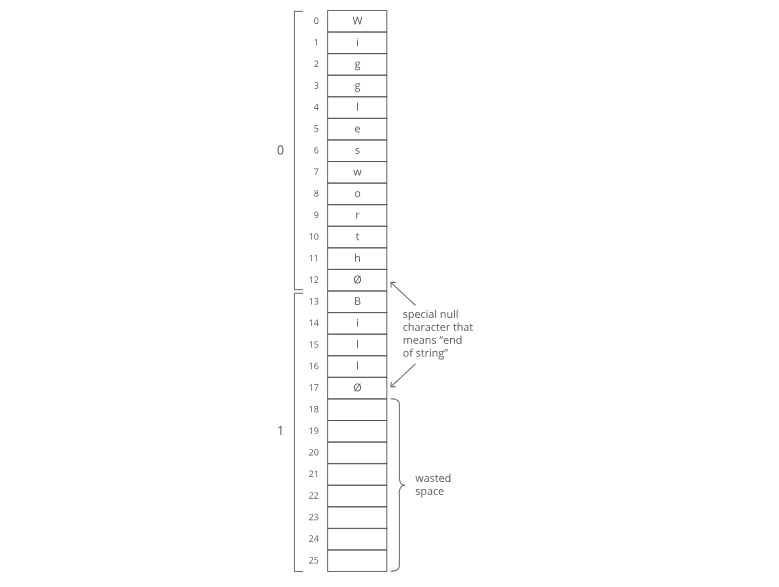

> "Wigglesworth" is a cute baby name, right?

But look at all that wasted space after "Bill". And what if we wanted to store a string that was more than 13 characters? We'd be out of luck.

There's a better way. Instead of storing the strings right inside our array, let's just put the strings wherever we can fit them in memory. Then we'll have each element in our array hold the address in memory of its corresponding string. Each address is an integer, so really our outer array is just an array of integers. We can call each of these integers a **pointer**, since it points to another spot in memory.

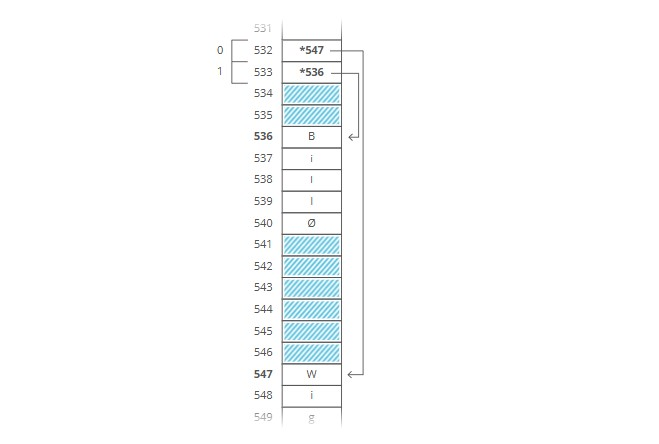

> The pointers are marked with a * at the beginning.

Pretty clever, right? This fixes both the disadvantages of arrays:

1. The items don't have to be the same length—each string can be as long or as short as we want.
2. We don't need enough uninterrupted free memory to store all our strings next to each other—we can place each of them separately, wherever there's space in RAM.

We fixed it! No more tradeoffs. Right?

Nope. Now we have a new tradeoff:

Remember how the memory controller sends the contents of nearby memory addresses to the processor with each read? And the processor caches them? So reading sequential addresses in RAM is faster because we can get most of those reads right from the cache?

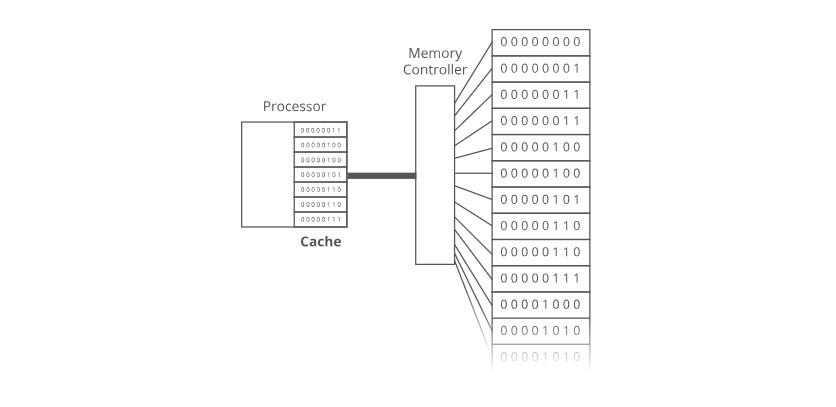

Our original array was very **cache-friendly**, because everything was sequential. So reading from the 0th index, then the 1st index, then the 2nd, etc. got an extra speedup from the processor cache.

**But the pointers in this array make it not cache-friendly**, because the baby names are scattered randomly around RAM. So reading from the 0th index, then the 1st index, etc. doesn't get that extra speedup from the cache.

That's the tradeoff. This pointer-based array requires less uninterrupted memory and can accommodate elements that aren't all the same size, but it's slower because it's not cache-friendly.

> This slowdown isn't reflected in the big O time cost. Lookups in this pointer-based array are still $O(1)$ time.

## **Dynamic arrays**

Let's build a very simple word processor. What data structure should we use to store the text as our user writes it?

Strings are stored as arrays, right? So we should use an array?

Here's where that gets tricky: **when we allocate an array in a low-level language like C, we have to specify upfront how many indices we want our array to have.**

There's a reason for this—the computer has to reserve space in memory for the array and commit to not letting anything else use that space. We can't have some other program overwriting the elements in our array!

The computer can't reserve all its memory for a single array. So we have to tell it how much to reserve.

But for our word processor, we don't know ahead of time how long the user's document is going to be! So what can we do?

Just make an array and program it to resize itself when it runs out of space! This is called a **dynamic array**, and it's built on top of a normal array.

> Python, Ruby, and JavaScript use dynamic arrays for their default array-like data structures. In Python, they're called "lists." Other languages have both. For example, in Java, array is a static array (whose size we have to define ahead of time) and ArrayList is a dynamic array.

Here's how it works:

When you allocate a dynamic array, your dynamic array implementation makes an underlying static array. The starting size depends on the implementation—let's say our implementation uses 10 indices:

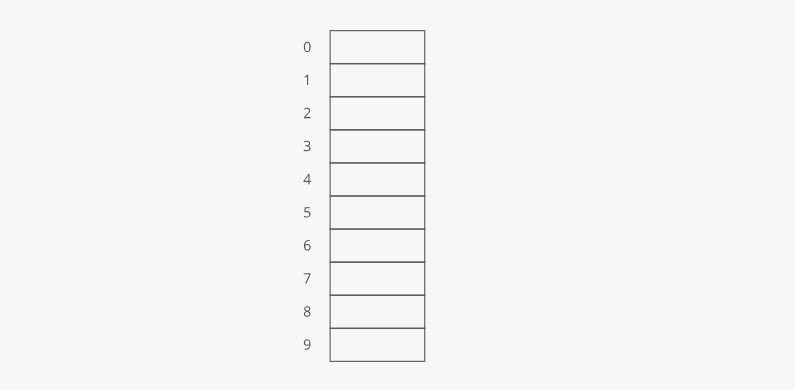

Say you append 4 items to your dynamic array:

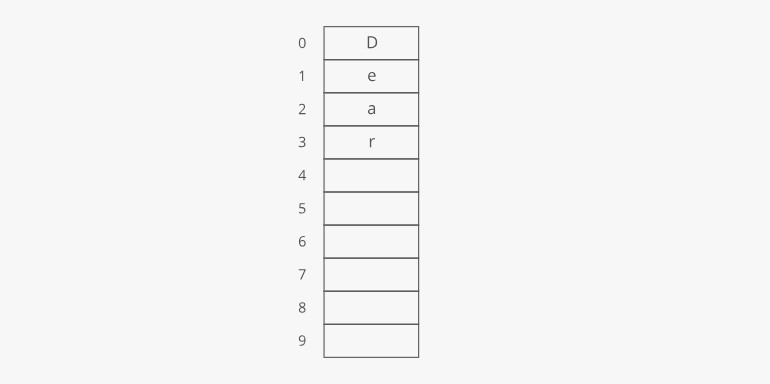

At this point, our dynamic array contains 4 items. It has a length of 4. But the underlying array has a length of 10.

We'd say this dynamic array's **size** is 4 and its **capacity** is 10.

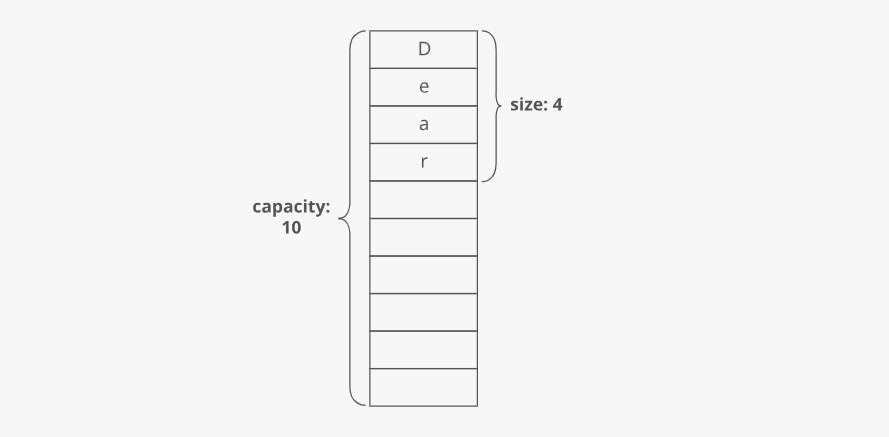

The dynamic array stores an end_index to keep track of where the dynamic array ends and the extra capacity begins.

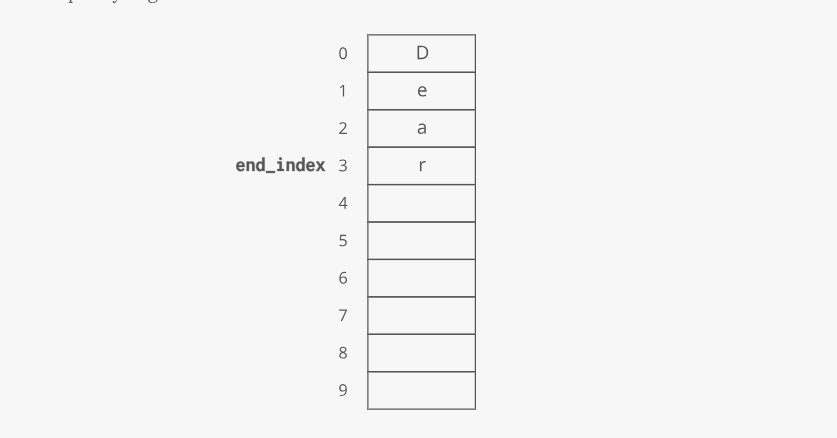

If you keep appending, at some point you'll use up the full capacity of the underlying array:

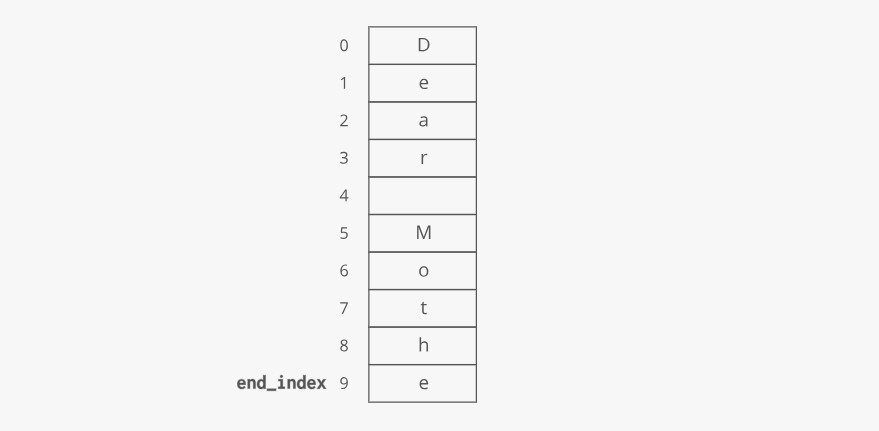

Next time you append, the dynamic array implementation will do a few things under the hood to make it work:

1. **Make a new, bigger array.** Usually twice as big.

Why not just extend the existing array? Because that memory might already be taken. Say we have Spotify open and it's using a handful of memory addresses right after the end of our old array. We'll have to skip that memory and reserve the next 20 uninterrupted memory slots for our new array:

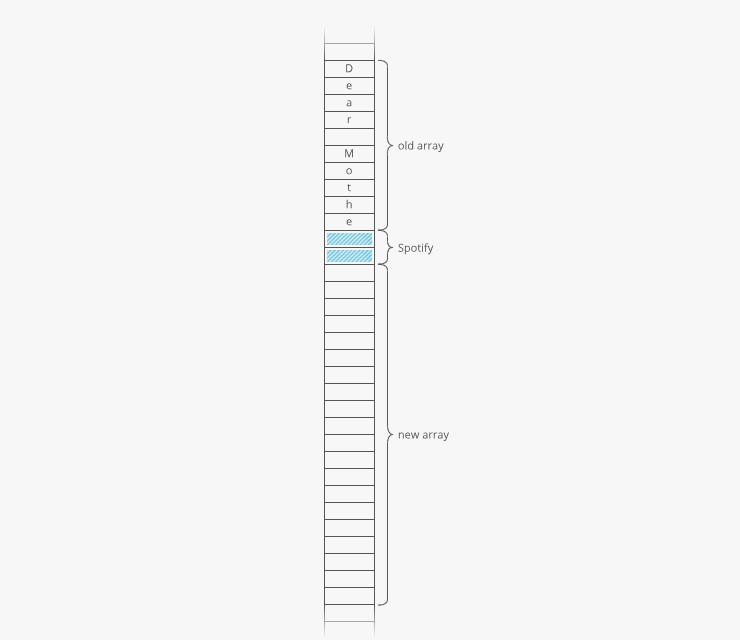

2. **Copy *each* element from the old array into the new array.**

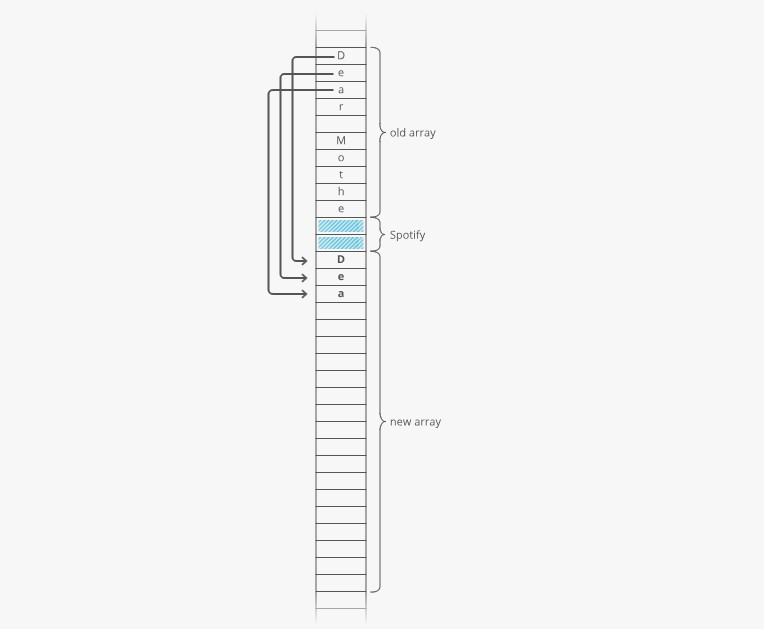

3. **Free up the old array.** This tells the operating system, "you can use this memory for something else now."

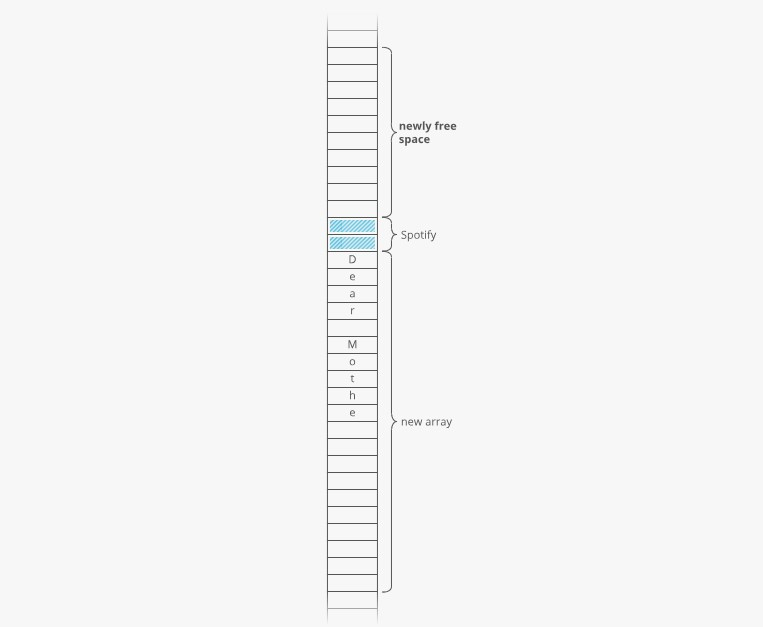

4. **Append your new item.**



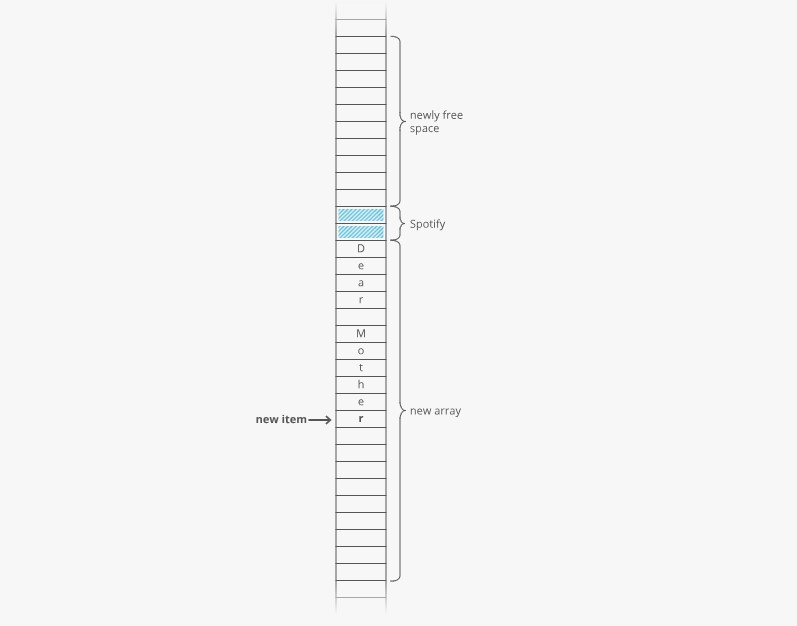

We could call these special appends "doubling" appends since they require us to make a new array that's (usually) double the size of the old one.

Appending an item to an array is usually an $O(1)$ time operation, but a **single doubling append is an $O(n)$ time operation since we have to copy all $n$ items from our array.**

Does that mean an append operation on a dynamic array is always worst-case $O(n)$ time? Yes. So if we make an empty dynamic array and append $n$ items, that has some crazy time cost like $O(n^2)$ or $O(n!)$?!?! Not quite.

While the time cost of each special $O(n)$ doubling append doubles each time, the number of $O(1)$ appends you get until the next doubling append also doubles. This kind of "cancels out," and we can say each append has an *average cost or amortized cost of $O(1)$*.

Given this, in industry we usually wave our hands and say dynamic arrays have a time cost of $O(1)$ for appends, even though strictly speaking that's only true for the *average case or the amortized cost*.

In an interview, if we were worried about that $O(n)$-time worst-case cost of appends, we might try to use a normal, non-dynamic array.

**The advantage of dynamic arrays over arrays is that you don't have to specify the size ahead of time, but the disadvantage is that some appends can be expensive.** That's the tradeoff.

But what if we wanted the best of both worlds...

## **Linked lists**

Our word processor is definitely going to need fast appends—appending to the document is like the main thing you do with a word processor.

Can we build a data structure that can store a string, has fast appends, and doesn't require you to say how long the string will be ahead of time?

Let's focus first on not having to know the length of our string ahead of time. Remember how we used pointers to get around length issues with our array of baby names?

What if we pushed that idea even further?

What if each character in our string were a two-index array with:

1. the character itself
2. a pointer to the next character

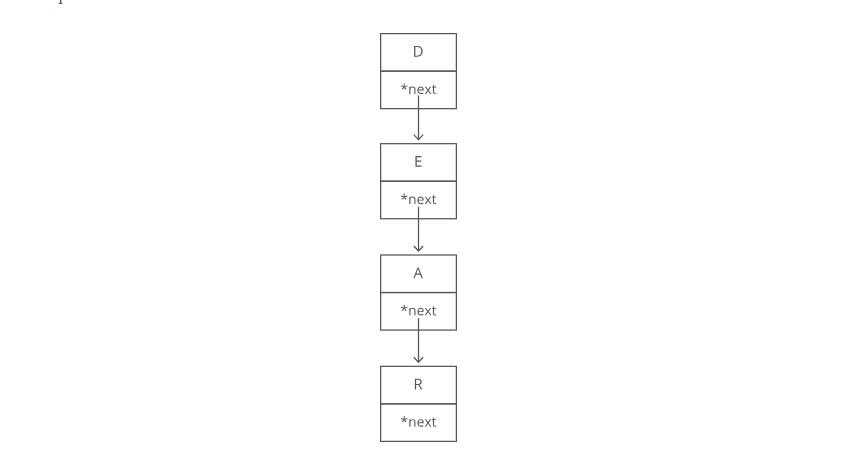

We would call each of these two-item arrays a **node** and we'd call this series of nodes a **linked list**.

Here's how we'd actually implement it in memory:

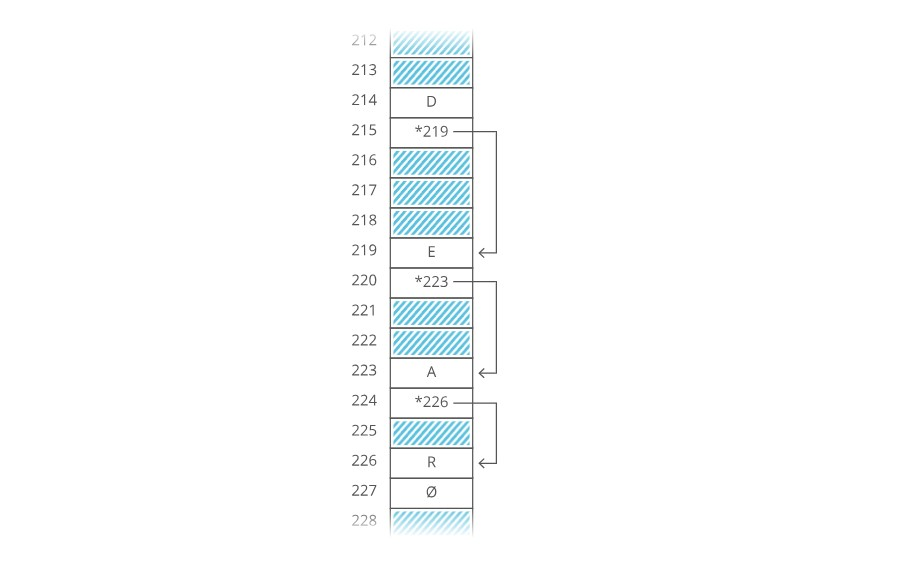

Notice how we're free to store our nodes wherever we can find two open slots in memory. They don't have to be next to each other. They don't even have to be in order:

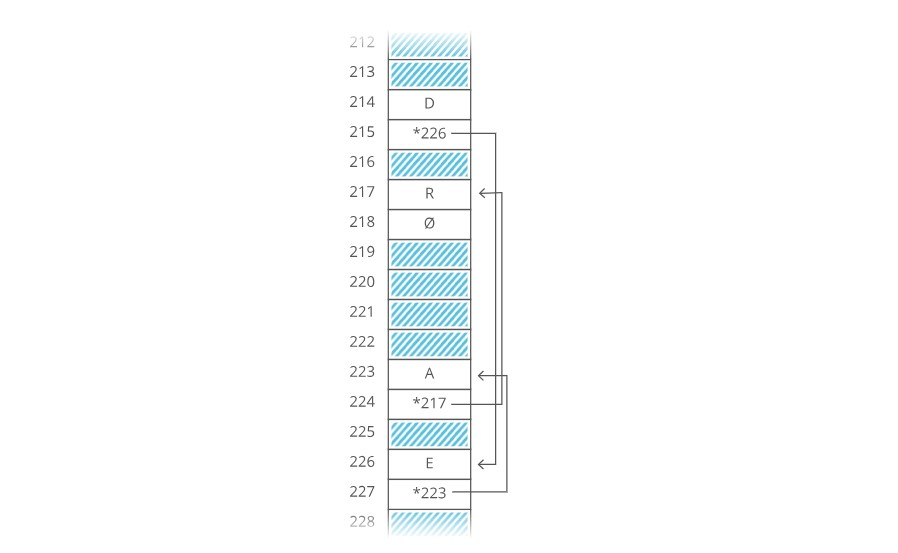

> "But that's not cache-friendly," you may be thinking. Good point! We'll get to that.

The first node of a linked list is called the **head**, and the last node is usually called the **tail**.

> Confusingly, some people prefer to use "tail" to refer to everything after the head of a linked list. In an interview it's fine to use either definition. Briefly say which definition you're using, just to be clear.

It's important to have a pointer variable referencing the head of the list—otherwise we'd be unable to find our way back to the start of the list!

We'll also sometimes keep a pointer to the tail. That comes in handy when we want to add something new to the end of the linked list. In fact, let's try that out:

Suppose we had the string "LOG" stored in a linked list:

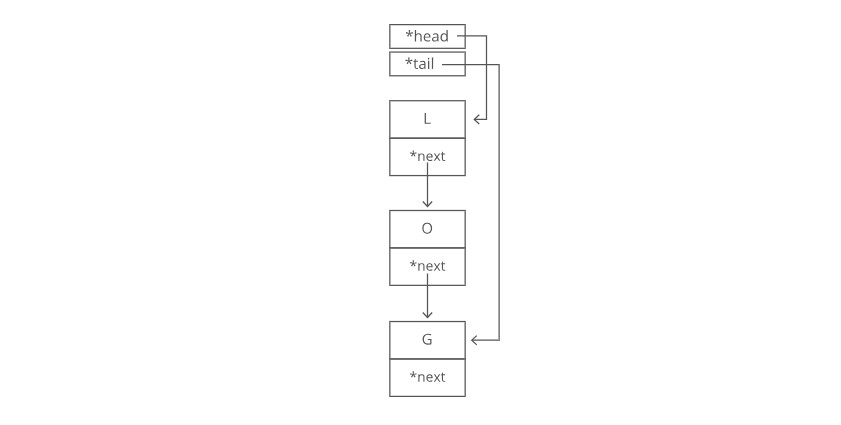

Suppose we wanted to add an "S" to the end, to make it "LOGS". How would we do that?

Easy. We just put it in a new node:



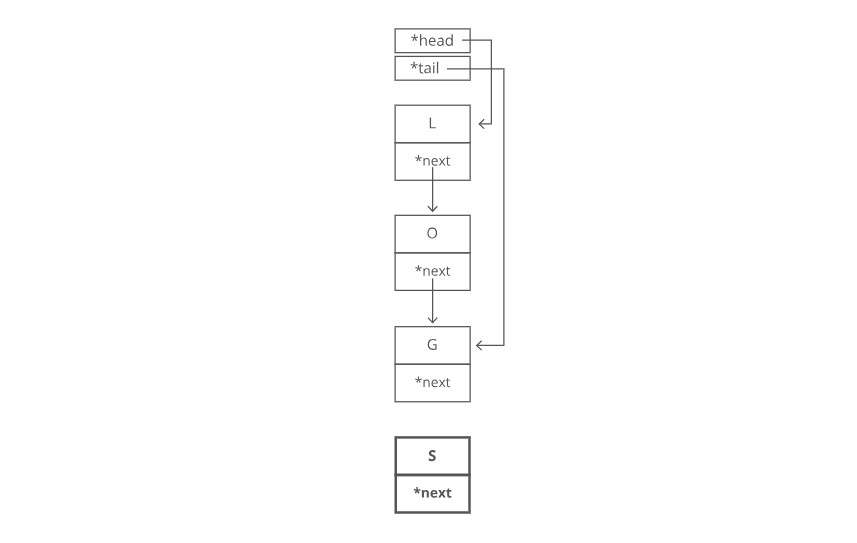

And tweak some pointers:

1. Grab the last letter, which is "G". Our tail pointer lets us do this in $O(1)$ time.

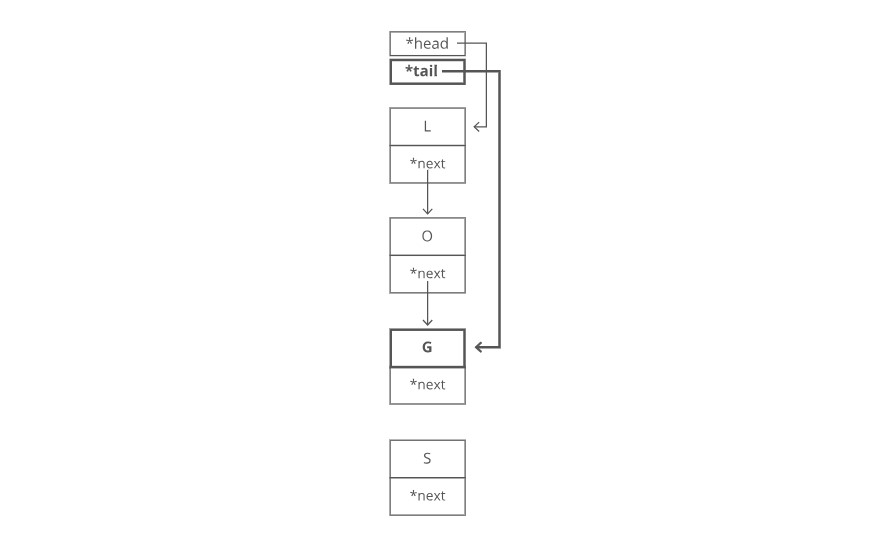

2. Point the last letter's next to the letter we're appending ("S").

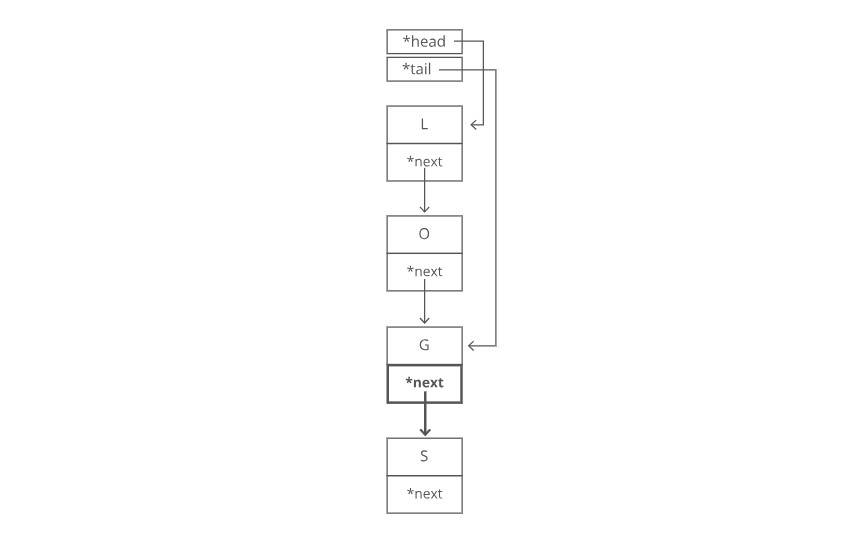

3. Update the tail pointer to point to our new last letter, "S".

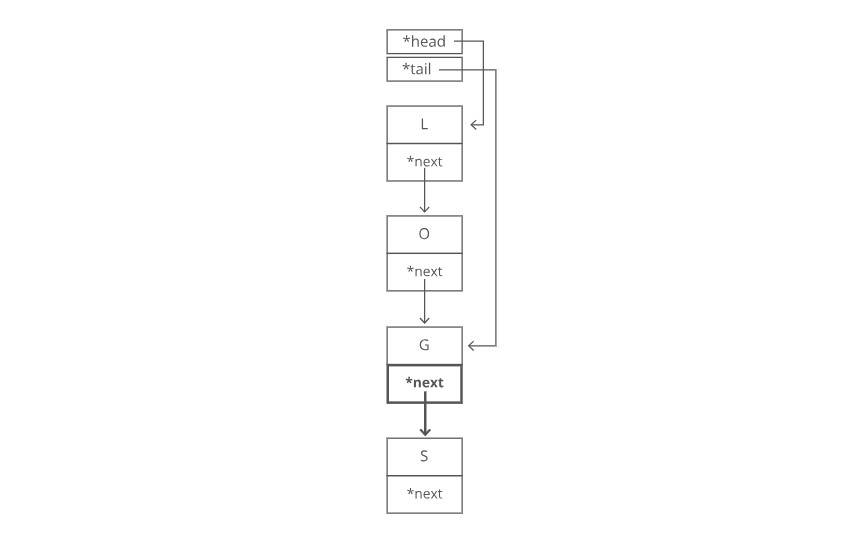

That's $O(1)$ time.

> Why is it $O(1)$ time? Because the runtime doesn't get bigger if the string gets bigger. No matter how many characters are in our string, we still just have to tweak a couple pointers for any append.

Now, what if instead of a linked list, our string had been a dynamic array? We might not have any room at the end, forcing us to do one of those doubling operations to make space:

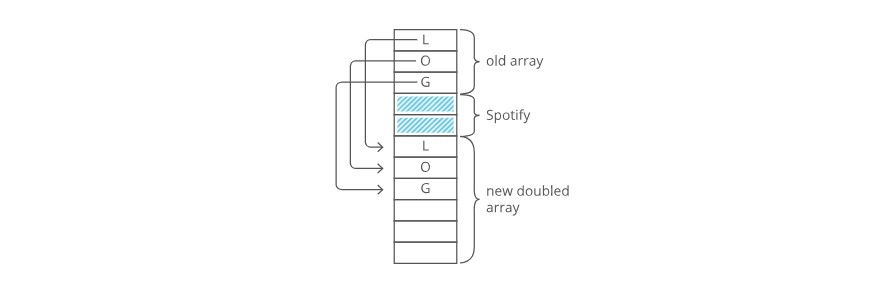

So with a dynamic array, our append would have a worst-case time cost of O(n).

**Linked lists have worst-case $O(1)$-time appends, which is better than the worst-case $O(n)$ time of dynamic arrays.**

> That worst-case part is important. The average case runtime for appends to linked lists and dynamic arrays is the same: $O(1)$.

Now, what if we wanted to prepend something to our string? Let's say we wanted to put a "B" at the beginning.

For our linked list, it's just as easy as appending. Create the node:

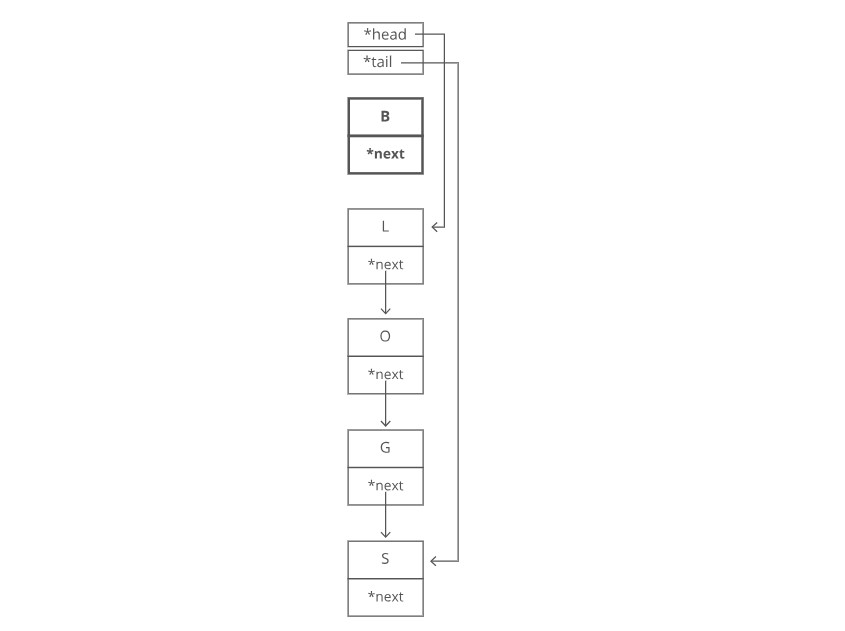

And tweak some pointers:

1. Point "B"'s next to "L".
2. Point the head to "B".

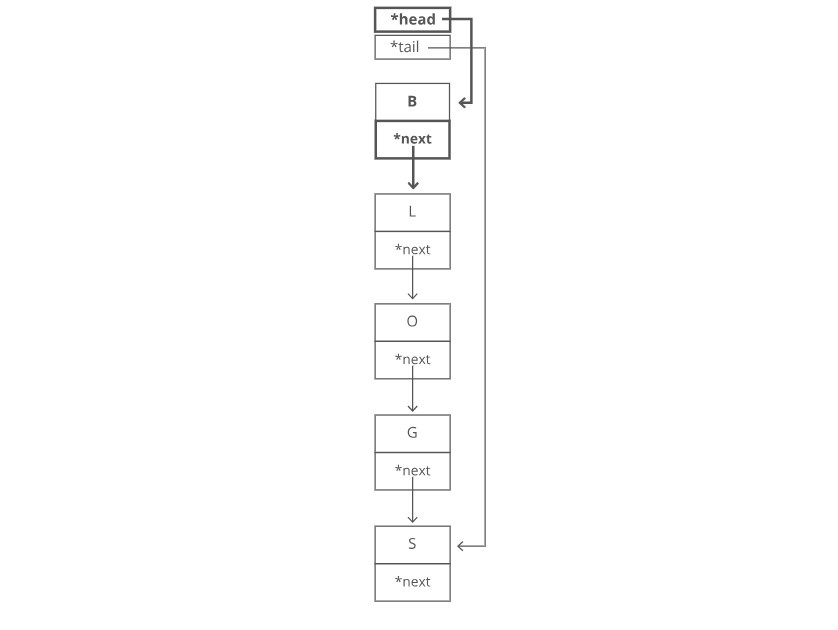

Bam.
$O(1)$ time again.

But if our string were a dynamic array...

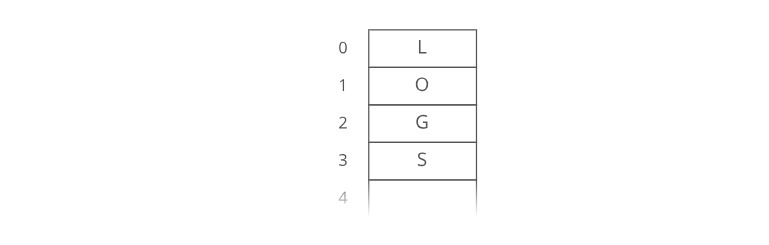

And we wanted to add in that "B":

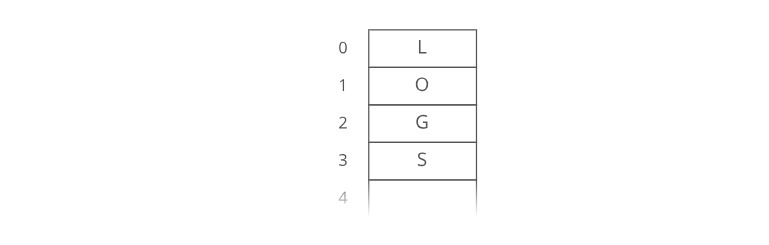

Eep. We have to make room for the "B"!

We have to move each character one space down:



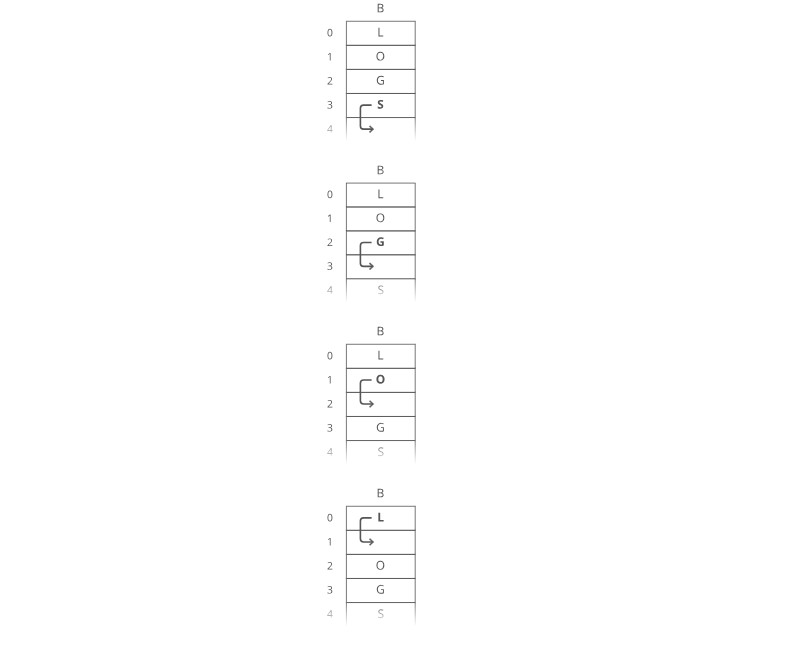

Now we can drop the "B" in there:



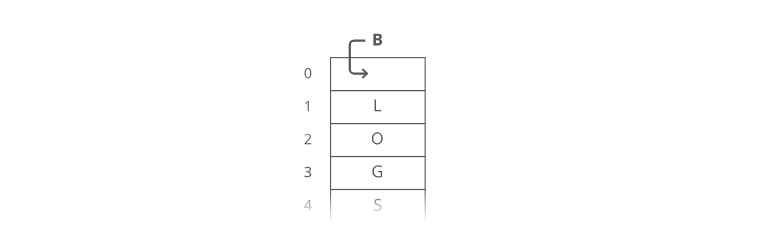

What's our time cost here?

It's all in the step where we made room for the first letter. We had to move all $n$ characters in our string. One at a time. That's $O(n)$ time.

**So linked lists have faster prepends ($O(1)$ time) than dynamic arrays ($O(n)$ time).**

> No "worst case" caveat this time—prepends for dynamic arrays are always $O(n)$ time. And prepends for linked lists are always $O(1)$ time.


These quick appends and prepends for linked lists come from the fact that linked list nodes can go anywhere in memory. They don't have to sit right next to each other the way items in an array do.

So if linked lists are so great, why do we usually store strings in an array? **Because arrays have $O(1)$-time lookups.** And those constant-time lookups come from the fact that all the array elements are lined up next to each other in memory.

Lookups with a linked list are more of a process, because we have no way of knowing where the $i$th node is in memory. So we have to walk through the linked list node by node, counting as we go, until we hit the $i$th item.

```python
def get_ith_item_in_linked_list(head, i):
    if i < 0:
        raise ValueError("i can't be negative: %d" % i)

    current_node = head
    current_position = 0
    while current_node:
        if current_position == i:
            # Found it!
            return current_node

        # Move on to the next node
        current_node = current_node.next
        current_position += 1

    raise ValueError('List has fewer than i + 1 (%d) nodes' % (i + 1))
```

That’s $i+1$ steps down our linked list to get to the $i$th node (we made our function zero-based to match indices in arrays). So **linked lists have $O(i)$-time lookups**. Much slower than the $O(1)$-time lookups for arrays and dynamic arrays.

Not only that—**walking down a linked list is not cache-friendly**. Because the next node could be *anywhere* in memory, we don’t get any benefit from the processor cache. This means lookups in a linked list are even slower.

So the tradeoff with linked lists is they have faster prepends and faster appends than dynamic arrays, but they have slower lookups.

## **Hash tables**
Quick lookups are often really important. For that reason, we tend to use arrays ($O(1)$-time lookups) much more often than linked lists ($O(i)$-time lookups).

For example, suppose we wanted to count how many times each ASCII character appears in [Romeo and Juliet](https://raw.githubusercontent.com/GITenberg/The-Tragedy-of-Romeo-and-Juliet_1112/master/1112.txt). How would we store those counts?

We can use arrays in a clever way here. Remember—characters are just numbers. In ASCII (a common character encoding) '$A$' is $65$, '$B$' is $66$, etc.

So we can use the character('s number value) as the index in our array, and store the count for that character at that index in the array:

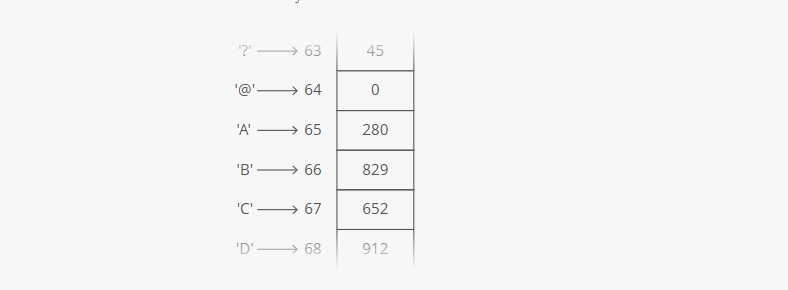

With this array, we can look up (and edit) the count for any character in constant time. Because we can access any index in our array in constant time.

Something interesting is happening here—this array isn't just a list of values. This array is storing two things: characters and counts. The characters are implied by the indices.

**So we can think of an array as a table with *two columns*...except you don't really get to pick the values in one column (the indices)—they're always 0, 1, 2, 3, etc.**

But what if we wanted to put any value in that column and still get quick lookups?

Suppose we wanted to count the number of times each word appears in Romeo and Juliet. Can we adapt our array?

Translating a character into an array index was easy. But we'll have to do something more clever to translate a word (a string) into an array index...

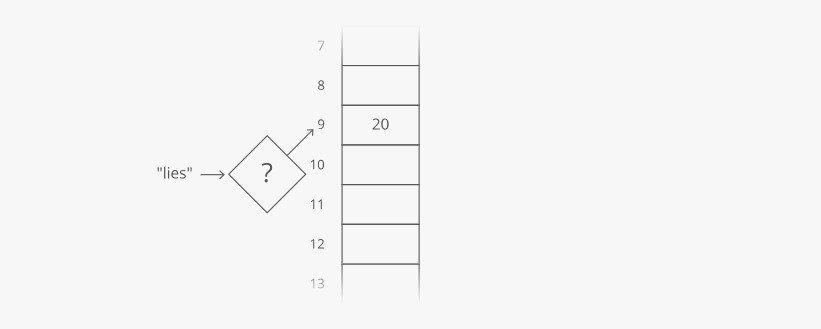

Here's one way we could do it:

Grab the number value for each character and add those up.

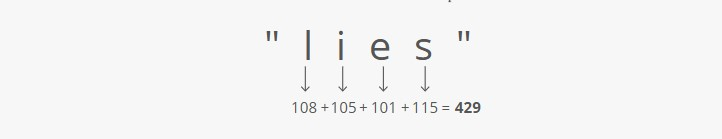

The result is 429. But what if we only have 30 slots in our array? We'll use a common trick for forcing a number into a specific range: the modulus operator (%).
<details >
<summary>modulus operator </summary>

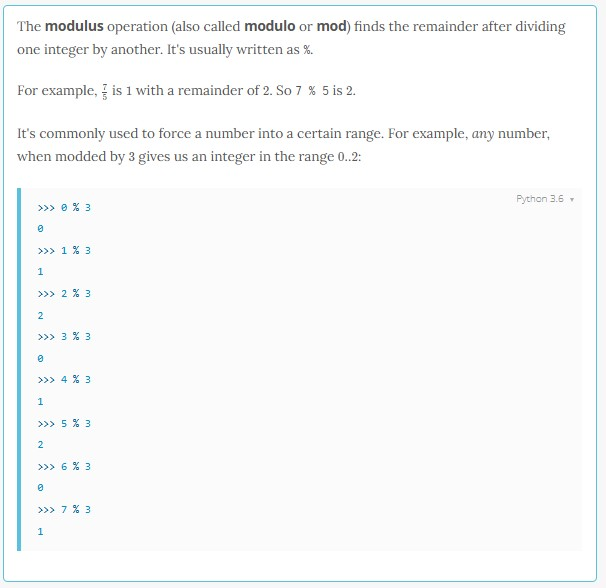


Modding our sum by 30 ensures we get a whole number that's less than 30 (and at least 0):
$$ \text{429 % 30 = 9}$$
Bam. That'll get us from a word (or any string) to an array index.

This data structure is called a **hash table** or **hash map**. In our hash table, the counts are the **values** and the words ("lies," etc.) are the **keys** (analogous to the indices in an array). The process we used to translate a key into an array index is called a **hashing function**.

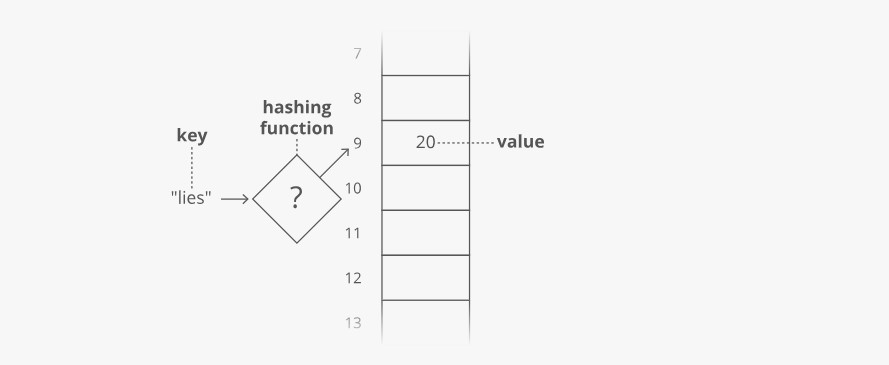

> The hashing functions used in modern systems get pretty complicated—the one we used here is a simplified example.

> Note that our quick lookups are only in one direction—we can quickly get the value for a given key, but the only way to get the key for a given value is to walk through all the values and keys.<br><br>
Same thing with arrays—we can quickly look up the value at a given index, but the only way to figure out the index for a given value is to walk through the whole array.

One problem—what if two keys hash to the same index in our array? Look at "lies" and "foes":

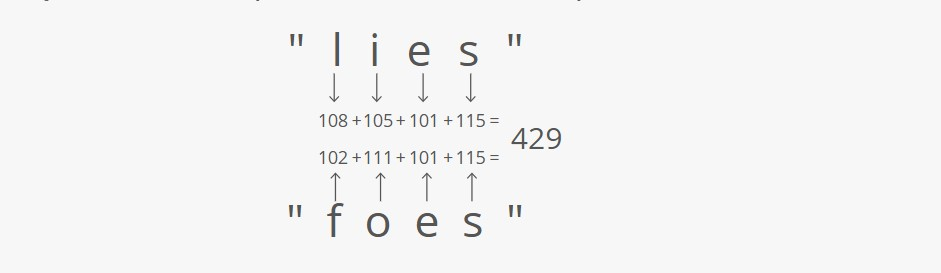

They both sum up to 429! So of course they'll have the same answer when we mod by 30:
$$ \text{429 % 30 = 9}
So our hashing function gives us the same answer for "lies" and "foes." This is called a **hash collision**. There are a few different strategies for dealing with them.

Here's a common one: instead of storing the actual values in our array, let's have each array slot hold a pointer to a linked list holding the counts for all the words that hash to that index:

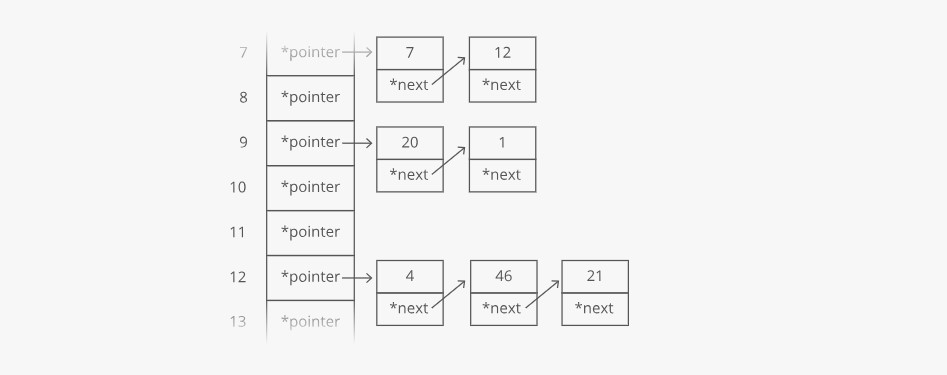

One problem—how do we know which count is for "lies" and which is for "foes"? To fix this, we'll store the word as well as the count in each linked list node:

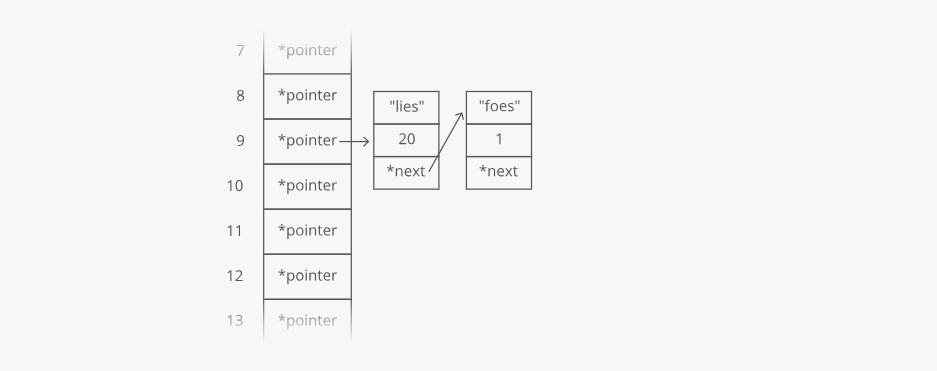

"But wait!" you may be thinking, "Now lookups in our hash table take $O(n)$ time in the worst case, since we have to walk down a linked list." That's true! You could even say that in the worst case every key creates a hash collision, so our whole hash table degrades to a linked list.

In industry though, we usually wave our hands and say **collisions are rare enough that on average lookups in a hash table are $O(1)$ time**. And there are fancy algorithms that keep the number of collisions low and keep the lengths of our linked lists nice and short.

But that's sort of the tradeoff with hash tables. You get fast lookups by key...except some lookups could be slow. And of course, you only get those fast lookups in one direction—looking up the key for a given value still takes $O(n)$ time.

# **Summary**

**Arrays** have $O(1)$-time lookups. But you need enough uninterrupted space in RAM to store the whole array. And the array items need to be the same size.

But if your array stores **pointers** to the actual array items (like we did with our list of baby names), you can get around both those weaknesses. You can store each array item wherever there's space in RAM, and the array items can be different sizes. The tradeoff is that now your array is slower because it's not cache-friendly.

Another problem with arrays is you have to specify their sizes ahead of time. There are two ways to get around this: **dynamic arrays** and **linked lists**. Linked lists have faster appends and prepends than dynamic arrays, but dynamic arrays have faster lookups.

Fast lookups are really useful, especially if you can look things up not just by indices (0, 1, 2, 3, etc.) but by arbitrary keys ("lies", "foes"...any string). That's what **hash tables** are for. The only problem with hash tables is they have to deal with hash collisions, which means some lookups could be a bit slow.

#### **Each data structure has tradeoffs. You can't have it all.**

So you have to know what's important in the problem you're working on. What does your data structure need to do quickly? Is it lookups by index? Is it appends or prepends?

Once you know what's important, you can pick the data structure that does it best.

<br><br>
<div align='center'>
  <table>
    <tr>
      <td>
        <!-- <a href="https://github.com/SaifRasool92"> -->
          <img src="https://avatars.githubusercontent.com/u/170190067?v=4" width="300" alt="Saif Ur Rasool"/><br>
          <!-- <div align='center'>
            <sub><b>Saif Ur Rasool</b></sub>
          </div> -->
        </a>
      </td>
      <td>
        <h1><u>Created by Saif Ur Rasool</u> </h1>
        <br>
        <h6><bold>Professional Profiles:</bold></h6>
        <a href='https://www.linkedin.com/in/saif-ur-rasool/'>Linkedin</a>
        &nbsp;&nbsp;
        <a href='https://github.com/SaifRasool92'>Github</a>
        &nbsp;&nbsp;
        <a href='https://leetcode.com/u/Saif_Rasool/'>Leetcode</a>
        &nbsp;&nbsp;
        <a href='https://monkeytype.com/profile/Saif_ur_Rasool'>Monkeytype</a>
        &nbsp;&nbsp;
        <a href='https://lablab.ai/u/@Saif_123'>Lablab</a>
        &nbsp;&nbsp;
        <a href='https://www.behance.net/saifrasool2'>Behance</a>
        &nbsp;&nbsp;
        <br><br>
        <a href='https://www.duolingo.com/profile/SaifUrRasool'>Duolingo</a>
        <br><br>
        <h6>Certificates:</h6>
        <a href='https://digitalcredential.stanford.edu/check/09E8FB28F122CE1CB9A59536C67B8BE8508A5898A71233B6641137391929242FSm9lSGxRQXdrNk0zc215OFdac2Z6aGFTNFhTTC84VkNCbWZVb3NYOXZHQ1liQlVN'>SL @Stanford Code In Place '25</a>
        &nbsp;&nbsp;
        <a href='https://certificates.cs50.io/a9fa79dc-ae41-4317-9925-c7734bf4255d.pdf?size=letter'>Harvard CS50x Puzzle Day Winner '25</a>
        <br><br>
        <h6>Courses Taught:</h6>
        <a href='https://github.com/SaifRasool92/5PM_Python-Crash_Course_23th_June'>Python Crash Course</a>
      </td>
    </tr>
</table>
</div>